In [1]:
import matplotlib.pyplot as plt
from zoo.core import Config
from zoo.mmoe import Exp
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
conf = {
    "train_data_size": 1000,
    "dev_data_size": 100,
    "num_sin_params": 4,
    "model": "moe",
    "model_arch.dim_in": 100,
    "model_arch.dim_hidden_bottom": 16,
    "model_arch.dim_hidden_tower": 8,
    "model_arch.num_expert": 8,
    "model_arch.num_task": 2,
    "num_epoch": 20,
    "batch_size": 32,
    "lr": 1e-4,
    "num_process": 4,
    "task_corr": 0.1,
    "validate_freq": 100
}

# Performance of the Shared-Bottom model on synthetic data with different task correlation

In [3]:
def process_result(exp):
    df_source = []
    for result in exp.exp_results:
        df_source.append(dict(result))
    # process mean value from each single run
    return pd.DataFrame(df_source).mean()

In [4]:
config = Config(**conf)
config.model = 'shared_bottom'
config.model_arch.dim_hidden_bottom = 113
print(config)

{'train_data_size': 1000, 'dev_data_size': 100, 'num_sin_params': 4, 'model': 'shared_bottom', 'model_arch': {'dim_in': 100, 'dim_hidden_bottom': 113, 'dim_hidden_tower': 8, 'num_expert': 8, 'num_task': 2}, 'num_epoch': 20, 'batch_size': 32, 'lr': 0.0001, 'num_process': 4, 'task_corr': 0.1, 'validate_freq': 100}


  0%|          | 0/10 [00:00<?, ?it/s]

VanillaSharedBottomRegressor, with 13124 parameters


  0%|          | 0/10 [00:00<?, ?it/s]

VanillaSharedBottomRegressor, with 13124 parameters


  0%|          | 0/10 [00:00<?, ?it/s]

VanillaSharedBottomRegressor, with 13124 parameters


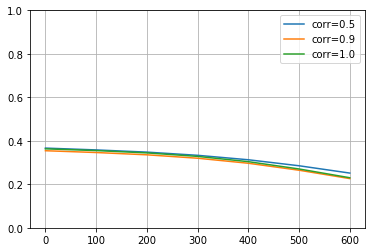

In [5]:
shared_bottom_stats = {}

for task_corr in [0.5, 0.9, 1.0]:
    config.task_corr = task_corr
    exp = Exp(config, repeat_num=10, seed=1)
    exp.run()
    series = process_result(exp)
    series.plot(label=f"corr={task_corr}")
    
    shared_bottom_stats[task_corr] = series

plt.ylim(0, 1.0)
plt.grid()
plt.legend()

# Performance on MMOE

In [6]:
config = Config(**conf)
config.model = 'mmoe'
config.model_arch.dim_hidden_bottom = 16

In [7]:
mmoe_stats = {}

for task_corr in [0.5, 0.9, 1.0]:
    config.task_corr = task_corr
    exp = Exp(config, repeat_num=10, seed=1)
    exp.run()
    series = process_result(exp)
    mmoe_stats[task_corr] = series

  0%|          | 0/10 [00:00<?, ?it/s]

MMoERegressor, with 14672 parameters


  0%|          | 0/10 [00:00<?, ?it/s]

MMoERegressor, with 14672 parameters


  0%|          | 0/10 [00:00<?, ?it/s]

MMoERegressor, with 14672 parameters


# Performance on MOE

In [8]:
config = Config(**conf)
config.model = 'moe'
print(config)

{'train_data_size': 1000, 'dev_data_size': 100, 'num_sin_params': 4, 'model': 'moe', 'model_arch': {'dim_in': 100, 'dim_hidden_bottom': 16, 'dim_hidden_tower': 8, 'num_expert': 8, 'num_task': 2}, 'num_epoch': 20, 'batch_size': 32, 'lr': 0.0001, 'num_process': 4, 'task_corr': 0.1, 'validate_freq': 100}


In [9]:
moe_stats = {}

for task_corr in [0.5, 0.9, 1.0]:
    config.task_corr = task_corr
    exp = Exp(config, repeat_num=10, seed=1)
    exp.run()
    series = process_result(exp)
    moe_stats[task_corr] = series

  0%|          | 0/10 [00:00<?, ?it/s]

MoERegressor, with 13872 parameters


  0%|          | 0/10 [00:00<?, ?it/s]

MoERegressor, with 13872 parameters


  0%|          | 0/10 [00:00<?, ?it/s]

MoERegressor, with 13872 parameters


# Performance of MMoE, MoE, SharedBottom on synthetic data with di erent correlations

(0, 0.5)

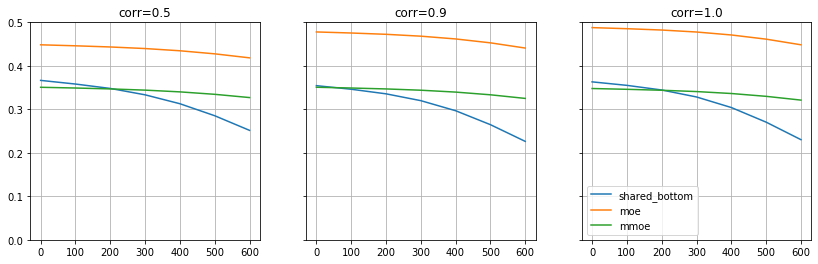

In [10]:
f, ax = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
for i, task_corr in enumerate([0.5, 0.9, 1.0]):
    ax[i].plot(shared_bottom_stats[task_corr], label='shared_bottom')
    ax[i].plot(moe_stats[task_corr], label='moe')
    ax[i].plot(mmoe_stats[task_corr], label='mmoe')
    ax[i].set_title(f"corr={task_corr}")
    ax[i].grid()

ax[-1].legend()
ax[-1].set_ylim(0, 0.5)